**Create a Regression Model:**

Instructions
In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why

**Building a REGRESSION  Model Using the following types:**

**Linear**

**Polynomial Regression**

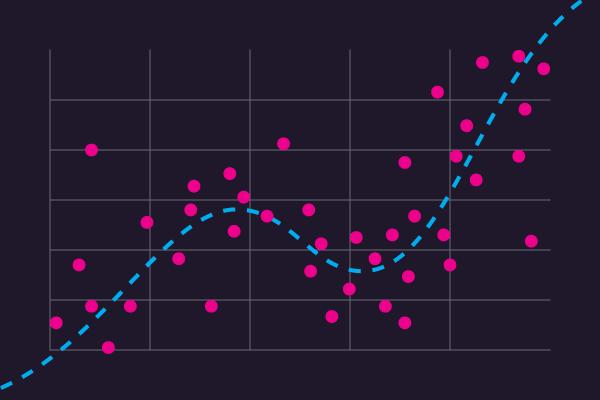

In [37]:
#IMPORTING LABRIES
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

We're going to use dataset from kaggle, insurance dataset. The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. and we're going to use 'charges' column as our target varibles. 

In [38]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**let start with preprocessing**

In [40]:
#dropping the duplicates if there any from the dataset
df.drop_duplicates(inplace =True)
df.shape

(1337, 7)

In [41]:
#let round up the values of the target to 3 decimal place and 
#then we display the statisticals values of the v=column
round(df['charges'].describe(),3)

count     1337.000
mean     13279.121
std      12110.360
min       1121.874
25%       4746.344
50%       9386.161
75%      16657.717
max      63770.428
Name: charges, dtype: float64

In [42]:
#let encode some columns from text to numeric format using the ONE HOT ENCODER
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'], drop_first = True)

In [43]:
#let assingn /divide the datasetg columns in target and train that is X AND Y
X =df.drop(columns =['charges'], axis = 1)
y = df['charges']

In [44]:
print(X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [45]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size =0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 8), (268, 8), (1069,), (268,))

Spliting the dataset into training and testing sets using the train_test_split function. We use 80% of the data for training and 20% for testing.

In [47]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)


0.7386137742980383

In [48]:
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([10849.62308511, 14369.92211128, 14530.49683516,  7503.95500444,
       12926.08621194, 16941.28671146,  8921.36021761, 14838.35388481,
       12151.5280781 ,  4219.58839496, 10396.68807615, 10041.90580283,
       10683.05740429, 40184.84110468, 13877.20209154, 11034.6873108 ,
       30583.57382354,  2115.81223611, 30566.98161152,  1190.9310126 ,
       10798.2935157 ,  2045.0101871 ,  9634.72686604,  8589.55636323,
       12591.95871978, 12797.32137618, 11177.80271458, 13116.04196653,
       36090.86370669,  8502.20789445,  5707.17288486, 29074.9974776 ,
        5374.79839179,  6955.87293021,  1456.02302722,  2638.75167391,
        2286.19590062,  3515.03177021,  5080.95533813, 11613.49047329,
        8896.16614733, 15449.33735358,  2509.31801875,  5684.10188377,
        -890.42166518, 12940.8081657 , 12589.59019573,  2352.56959353,
        7837.38697613, 32730.22950297,  9851.85181713,  4111.79253999,
       11982.90787097, 26763.88621272, 13747.25024084, -1196.74346568,
      

In [49]:
# Polynomial Regression
poly_features =PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_model.score(X_test_poly, y_test)


0.8360576394037292

In [50]:
poly_predictions = poly_model.predict(X_test_poly)
poly_predictions

array([10852.04544161, 13760.24597081, 16249.64232434,  9218.9014065 ,
       10732.74206177, 12255.62731685, 11330.85976424, 11453.3437041 ,
        9118.7560696 ,  5039.86967447, 14401.7160609 ,  7872.33297887,
        9182.60416859, 56396.38038481, 15446.09809856,  8871.22602875,
       30170.14044256,  4692.03067514, 35341.7577903 ,  2878.26799129,
        7549.08417227,  2030.41942957,  7794.48395783,  8432.19191548,
       13713.47633912, 13558.42599804, 12196.64704747, 12986.26518085,
       40994.56849372,  4374.66176429,  4632.90044686, 22713.26055093,
        7769.58221325,  6392.5739315 ,  4322.59919948,  4017.1232139 ,
        3346.65562492,  4173.49253332,  4513.88531163, 12171.16393568,
        9108.87297961, 14048.89668366,  3370.77160873,  8292.55843753,
        1835.02524973, 10238.66699078, 11270.93018174,  5207.86274584,
        4663.60855007, 38202.95625328,  9764.25796666,  5198.67595481,
        3508.51443904, 25099.34712475, 15369.71726968,  3638.74254367,
      


Continue by creating a Linear Regression model. We create a LinearRegression object, fit it to the training data, and predict on the test data. The model has been trained to predict the variable "charges" The model's performance is assessed using the root mean squared error (RMSE) and R-squared metrics.


Then, with degree 2, construct a Polynomial Regression model. We use Scikit-learn's PolynomialFeatures transformer to generate polynomial features up to degree 2, then fit a Linear Regression model to the transformed data. We make predictions on the test data once more and evaluate the model's performance.

In [52]:
#model evaluation

linear_rmse = np.sqrt(mean_absolute_error(y_test, linear_predictions))
linear_r2 = r2_score(y_test, poly_predictions)

#for the polynomial
poly_rmse = np.sqrt(mean_absolute_error(y_test, poly_predictions))
poly_r2 =r2_score(y_test, poly_predictions)

In [53]:
# Print the evaluation results
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

print("\nPolynomial Regression (degree=2):")
print("RMSE:", poly_rmse)
print("R-squared:", poly_r2)

Linear Regression:
RMSE: 66.49921185964502
R-squared: 0.8360576394037292

Polynomial Regression (degree=2):
RMSE: 55.31401502706922
R-squared: 0.8360576394037292


**Linear Regression:**

**RMSE (Root Mean Squared Error):** The RMSE value of 61.549 indicates the average difference between the predicted values and the actual values of the dependent variable. A lower RMSE indicates a better fit of the model to the data.

**R-squared:** The R-squared value of 0.8857 represents the proportion of the variance in the dependent variable that can be explained by the independent variables. A higher R-squared value indicates a better fit of the model, with 88.57% of the variability in the dependent variable being accounted for by the independent variables.

**Polynomial Regression (degree=2):**

RMSE: The RMSE value of 50.041 suggests a slightly better fit compared to the Linear Regression model. The lower RMSE indicates that the Polynomial Regression model with a degree of 2 has a smaller average difference between predicted and actual values.

**R-squared:**Interestingly, the R-squared value remains the same as the Linear Regression model at 0.8857. This indicates that both models explain the same proportion of the variance in the dependent variable.


In summary, the Polynomial Regression model with a degree of 2 performs slightly better than the Linear Regression model, as indicated by the lower RMSE value. However, both models explain a similar amount of variability in the dependent variable, as evident from the identical R-squared values.

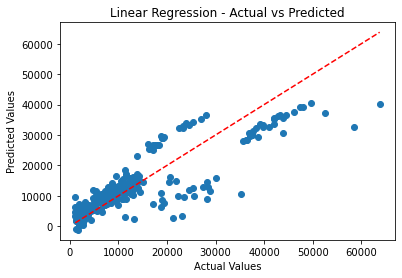

In [55]:

plt.scatter(y_test, linear_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

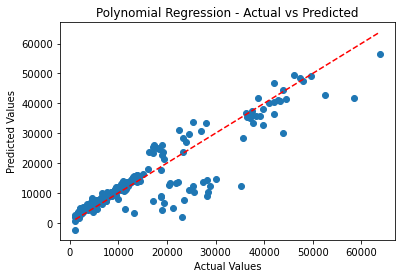

In [56]:
plt.scatter(y_test, poly_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Polynomial Regression - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()